In [65]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
full_df = pd.merge(ride_df,city_df, on="city")
# Display the data table for preview
full_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

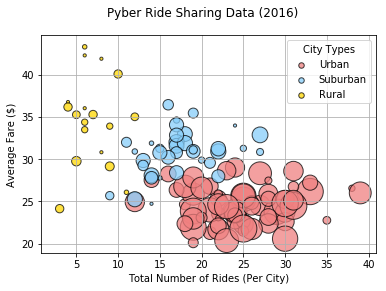

In [66]:
# Obtain the x and y coordinates for each of the three city types
#urban
urban_full = full_df.loc[full_df["type"] == "Urban",:]
urban_full = urban_full.groupby("city")
u_avg_fare = urban_full["fare"].mean()
u_tot_num_rides = urban_full["ride_id"].count()
u_tot_num_drivers = urban_full["driver_count"].unique()
u_tot_num_drivers = u_tot_num_drivers.str[0]
#suburban
suburban_full = full_df.loc[full_df["type"] == "Suburban",:]
suburban_full = suburban_full.groupby("city")
s_avg_fare = suburban_full["fare"].mean()
s_tot_num_rides = suburban_full["ride_id"].count()
s_tot_num_drivers = suburban_full["driver_count"].unique()
s_tot_num_drivers = s_tot_num_drivers.str[0]
#rural
rural_full = full_df.loc[full_df["type"] == "Rural",:]
rural_full = rural_full.groupby("city")
r_avg_fare = rural_full["fare"].mean()
r_tot_num_rides = rural_full["ride_id"].count()
r_tot_num_drivers = rural_full["driver_count"].unique()
r_tot_num_drivers = r_tot_num_drivers.str[0]

# Build the scatter plots for each city types
fig, ax = plt.subplots()
plt.scatter(u_tot_num_rides, u_avg_fare, color='LightCoral', label='Urban',s=u_tot_num_drivers*10,edgecolors = "black",alpha = 0.75)
plt.scatter(s_tot_num_rides, s_avg_fare, color='LightSkyBlue', label='Suburban',s=s_tot_num_drivers*10,edgecolors = "black",alpha = 0.75)
plt.scatter(r_tot_num_rides, r_avg_fare, color='Gold', label='Rural',s=r_tot_num_drivers*10,edgecolors = "black",alpha = 0.75)
# Incorporate the other graph properties

ax.set_xlabel("Total Number of Rides (Per City)")
ax.set_ylabel("Average Fare ($)")
fig.suptitle("Pyber Ride Sharing Data (2016)")
ax.grid()
# Create a legend
lgnd = ax.legend(["Urban","Suburban","Rural"],loc="best",title = "City Types")
# Incorporate a text label regarding circle size
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]
# Save Figure


In [67]:
# Show plot
plt.show()

## Total Fares by City Type

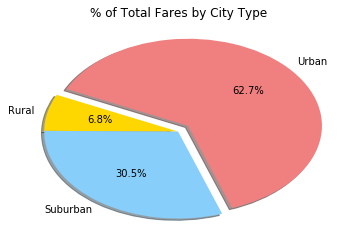

In [78]:
# Calculate Type Percents
type_group = full_df.groupby("type")
tot_fare = type_group["fare"].sum().sum()
per_fare = type_group["fare"].sum()/tot_fare * 100
per_fare.head()
# Build Pie Chart
explode = [0,0,.1]
colors = ["Gold","LightSkyBlue","LightCoral"]
labels = ["Rural","Suburban","Urban"]
plt.pie(per_fare, explode = explode, labels = labels, colors = colors, autopct = "%1.1f%%", shadow = True, startangle = 155)
plt.title("% of Total Fares by City Type")
# Save Figure
plt.savefig("../Images/PercentofFaresbyCity.png")

In [79]:
# Show Figure
plt.show()

## Total Rides by City Type

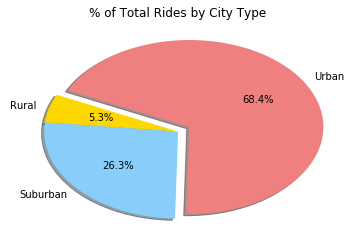

In [80]:
# Calculate Ride Percents
tot_type = type_group["type"].count().sum()
per_type = type_group["type"].count() / tot_type * 100
per_type.head()
# Build Pie Chart
explode = [0,0,.1]
colors = ["Gold","LightSkyBlue","LightCoral"]
labels = ["Rural","Suburban","Urban"]
plt.pie(per_type, explode = explode, labels = labels, colors = colors, autopct = "%1.1f%%", shadow = True, startangle = 155)
plt.title("% of Total Rides by City Type")
# Save Figure
plt.savefig("../Images/PercentofRidesbyCity.png")

In [81]:
# Show Figure
plt.show()

## Total Drivers by City Type

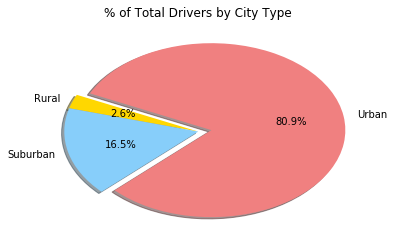

In [77]:
# Calculate Driver Percents
no_dupes = full_df.drop_duplicates("city").groupby("type")
tot_driver_type = no_dupes["driver_count"].sum().sum()
per_driver_type = no_dupes["driver_count"].sum() / tot_driver_type * 100

# Build Pie Charts
explode = [0,0,.1]
colors = ["Gold","LightSkyBlue","LightCoral"]
labels = ["Rural","Suburban","Urban"]
plt.pie(per_driver_type, explode = explode, labels = labels, colors = colors, autopct = "%1.1f%%", shadow = True, startangle = 155)
plt.title("% of Total Drivers by City Type")
# Save Figure
plt.savefig("../Images/PercentofTotalDriversbyCity.png")

In [82]:
# Show Figure
plt.show()

In [ ]:
#Notable Trends

#1) More Rides occurred in Urban city types when the ride fares were below $30

#2) Despite having more drivers in the urban city type, this does not necessarily mean that the total amount of fares 

#3)